In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [241]:
data = pd.read_csv (r'D:\KULIAH\CrimesOnWomenData.csv', sep= ",")
data.head()

,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      736 non-null    int64 
 1   State   736 non-null    object
 2   Year    736 non-null    int64 
 3   Rape    736 non-null    int64 
 4   K&A     736 non-null    int64 
 5   DD      736 non-null    int64 
 6   AoW     736 non-null    int64 
 7   AoM     736 non-null    int64 
 8   DV      736 non-null    int64 
 9   WT      736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [264]:
datacopy = data.copy()

# Missing Value & Dummy Variabel

In [244]:
Missing_value =data.isnull().sum()
print(Missing_value) 

No       0
State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64


Kesimpulan : Tidak terdapat missing value di seluruh kolom dataset 

In [245]:
dummy_variabel = pd.get_dummies(data, columns=['State']).astype(int)

In [246]:
print(dummy_variabel)
print(dummy_variabel.info())

      No  Year  Rape   K&A   DD   AoW   AoM    DV  WT  State_A & N ISLANDS  \
0      0  2001   871   765  420  3544  2271  5791   7                    0   
1      1  2001    33    55    0    78     3    11   0                    0   
2      2  2001   817  1070   59   850     4  1248   0                    0   
3      3  2001   888   518  859   562    21  1558  83                    0   
4      4  2001   959   171   70  1763   161   840   0                    0   
..   ...   ...   ...   ...  ...   ...   ...   ...  ..                  ...   
731  731  2021  1250  4083  141  2068   417  4731   4                    0   
732  732  2021   315   904   16  1851    10   501   1                    0   
733  733  2021     2     1    0     5     1     9   0                    0   
734  734  2021     0     0    0     1     1     3   0                    0   
735  735  2021     2     0    2    31     3    12   0                    0   

     ...  State_PUDUCHERRY  State_PUNJAB  State_RAJASTHAN  Stat

# Outlier & Solusi

In [254]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'object' and col not in ['No', 'Year']]
print("Kolom:", numerical_columns)

Kolom: ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']


In [255]:
def find_outliers_iqr(df):
    outliers = {}
    for col in numerical_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        outlier = data[(data[col] < batas_bawah) | (data[col] > batas_atas)]
        if not outlier.empty:  
            outliers[col] = outlier 
            print(f'Outlier pada kolom {col}:')
            display(outliers[col]) 

    return outliers
    
outliers = find_outliers_iqr(data)

if outliers:
    print("Outlier ditemukan.")
else:
    print("Tidak ada outlier.")

Outlier pada kolom Rape:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
641,641,MADHYA PRADESH,2019,2485.0,173.5,550.0,302.5,174.0,5486.0,21.0
713,713,MADHYA PRADESH,2021,2496.0,173.5,172.0,302.5,18.0,439.0,0.0


Outlier pada kolom K&A:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
21,21,RAJASTHAN,2001,1049.0,2165.0,376.0,2878.0,56.0,5532.0,1.0
25,25,UTTAR PRADESH,2001,1958.0,2879.0,16.0,2870.0,18.0,7365.0,0.0
55,55,RAJASTHAN,2002,1051.0,2019.0,399.0,2730.0,44.0,5691.0,0.0
59,59,UTTAR PRADESH,2002,1415.0,2298.0,16.0,2145.0,18.0,5679.0,0.0
123,123,RAJASTHAN,2004,1038.0,1881.0,379.0,2825.0,41.0,6781.0,1.0
127,127,UTTAR PRADESH,2004,1397.0,2324.0,16.0,1900.0,18.0,4950.0,3.0
161,161,UTTAR PRADESH,2005,1217.0,2256.0,16.0,1835.0,18.0,4505.0,0.0
195,195,UTTAR PRADESH,2006,1314.0,2551.0,16.0,2096.0,18.0,5204.0,0.0
259,259,RAJASTHAN,2008,1355.0,1863.0,439.0,2520.0,19.0,8113.0,0.0
265,265,WEST BENGAL,2008,2263.0,1907.0,451.0,2396.0,94.0,439.0,5.0


Outlier pada kolom DD:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
13,13,MADHYA PRADESH,2001,291.0,668.0,609.0,302.5,18.0,2562.0,0.0
34,34,ANDHRA PRADESH,2002,1002.0,854.0,449.0,3799.0,18.0,7018.0,0.0
68,68,ANDHRA PRADESH,2003,946.0,931.0,466.0,4128.0,18.0,8167.0,5.0
102,102,ANDHRA PRADESH,2004,1016.0,1030.0,512.0,3817.0,18.0,8388.0,2.0
136,136,ANDHRA PRADESH,2005,935.0,995.0,443.0,3595.0,18.0,8696.0,3.0
163,163,WEST BENGAL,2005,1686.0,1039.0,446.0,1572.0,54.0,6936.0,0.0
170,170,ANDHRA PRADESH,2006,1049.0,1329.0,519.0,4534.0,18.0,439.0,0.0
189,189,ODISHA,2006,985.0,577.0,457.0,2415.0,247.0,694.0,12.0
197,197,WEST BENGAL,2006,1731.0,1199.0,445.0,1837.0,63.0,7414.0,1.0
204,204,ANDHRA PRADESH,2007,1070.0,1564.0,613.0,4406.0,18.0,439.0,0.0


Outlier pada kolom AoW:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
34,34,ANDHRA PRADESH,2002,1002.0,854.0,449.0,3799.0,18.0,7018.0,0.0
68,68,ANDHRA PRADESH,2003,946.0,931.0,466.0,4128.0,18.0,8167.0,5.0
102,102,ANDHRA PRADESH,2004,1016.0,1030.0,512.0,3817.0,18.0,8388.0,2.0
136,136,ANDHRA PRADESH,2005,935.0,995.0,443.0,3595.0,18.0,8696.0,3.0
170,170,ANDHRA PRADESH,2006,1049.0,1329.0,519.0,4534.0,18.0,439.0,0.0
...,...,...,...,...,...,...,...,...,...,...
700,700,ANDHRA PRADESH,2021,1188.0,613.0,108.0,5108.0,18.0,7092.0,0.0
702,702,ASSAM,2021,1733.0,173.5,198.0,4499.0,184.0,439.0,22.0
710,710,JHARKHAND,2021,555.0,906.0,158.0,5105.0,71.0,2336.0,0.0
711,711,KARNATAKA,2021,771.0,179.0,9.0,4059.0,504.0,4997.0,5.0


Outlier pada kolom AoM:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
7,7,HARYANA,2001,398.0,297.0,285.0,478.0,401.0,1513.0,0.0
9,9,JAMMU & KASHMIR,2001,169.0,504.0,13.0,622.0,288.0,50.0,0.0
19,19,ODISHA,2001,790.0,434.0,294.0,1655.0,458.0,1266.0,0.0
43,43,JAMMU & KASHMIR,2002,192.0,596.0,18.0,785.0,368.0,54.0,0.0
77,77,JAMMU & KASHMIR,2003,211.0,615.0,10.0,875.0,376.0,71.0,0.0
...,...,...,...,...,...,...,...,...,...,...
707,707,HARYANA,2021,1716.0,2958.0,275.0,2882.0,290.0,5755.0,28.0
711,711,KARNATAKA,2021,771.0,179.0,9.0,4059.0,504.0,4997.0,5.0
712,712,KERALA,2021,291.0,173.5,522.0,302.5,250.0,7929.0,15.0
727,727,UTTARAKHAND,2021,1123.0,173.5,454.0,2485.0,424.0,439.0,0.0


Outlier pada kolom DV:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
25,25,UTTAR PRADESH,2001,1958.0,2879.0,16.0,2870.0,18.0,7365.0,0.0
34,34,ANDHRA PRADESH,2002,1002.0,854.0,449.0,3799.0,18.0,7018.0,0.0
68,68,ANDHRA PRADESH,2003,946.0,931.0,466.0,4128.0,18.0,8167.0,5.0
102,102,ANDHRA PRADESH,2004,1016.0,1030.0,512.0,3817.0,18.0,8388.0,2.0
123,123,RAJASTHAN,2004,1038.0,1881.0,379.0,2825.0,41.0,6781.0,1.0
129,129,WEST BENGAL,2004,1475.0,1018.0,396.0,1566.0,64.0,6334.0,12.0
136,136,ANDHRA PRADESH,2005,935.0,995.0,443.0,3595.0,18.0,8696.0,3.0
163,163,WEST BENGAL,2005,1686.0,1039.0,446.0,1572.0,54.0,6936.0,0.0
184,184,MAHARASHTRA,2006,1500.0,921.0,387.0,3479.0,18.0,6738.0,1.0
191,191,RAJASTHAN,2006,1085.0,1553.0,394.0,2582.0,31.0,7038.0,3.0


Outlier pada kolom WT:


,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871.0,765.0,420.0,3544.0,18.0,5791.0,7.0
23,23,TAMIL NADU,2001,423.0,607.0,191.0,1773.0,18.0,815.0,14.0
44,44,JHARKHAND,2002,797.0,178.0,275.0,411.0,3.0,588.0,36.0
71,71,BIHAR,2003,985.0,674.0,16.0,688.0,11.0,1880.0,37.0
105,105,BIHAR,2004,1390.0,997.0,16.0,704.0,13.0,2679.0,35.0
...,...,...,...,...,...,...,...,...,...,...
718,718,NAGALAND,2021,1456.0,173.5,293.0,302.5,18.0,4889.0,31.0
719,719,ODISHA,2021,464.0,1616.0,69.0,678.0,39.0,1714.0,12.0
723,723,TAMIL NADU,2021,823.0,1934.0,175.0,4365.0,18.0,439.0,12.0
725,725,TRIPURA,2021,291.0,173.5,16.0,302.5,27.0,439.0,12.0


Outlier ditemukan.


In [256]:
for col in outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    data[col] = np.where((data[col] < batas_bawah) | (data[col] > batas_atas), np.nan, data[col])
    
for col in outliers:
    median = data[col].median()
    data[col].fillna(median, inplace=True)
    
print("Data setelah penghapusan outlier:")
print(data[numerical_columns].head())

Data setelah penghapusan outlier:
    Rape     K&A     DD     AoW    AoM      DV   WT
0  871.0   765.0  420.0  3544.0   18.0  5791.0  0.0
1   33.0    55.0    0.0    78.0    3.0    11.0  0.0
2  817.0  1070.0   59.0   850.0    4.0  1248.0  0.0
3  888.0   518.0   16.0   562.0   21.0  1558.0  0.0
4  959.0   171.0   70.0  1763.0  161.0   840.0  0.0


In [257]:
nan_percent = (data.isna().sum() / len(data)) * 100
print("Persentase nilai NaN di setiap kolom:")
print(nan_percent)

Persentase nilai NaN di setiap kolom:
No       0.0
State    0.0
Year     0.0
Rape     0.0
K&A      0.0
DD       0.0
AoW      0.0
AoM      0.0
DV       0.0
WT       0.0
dtype: float64


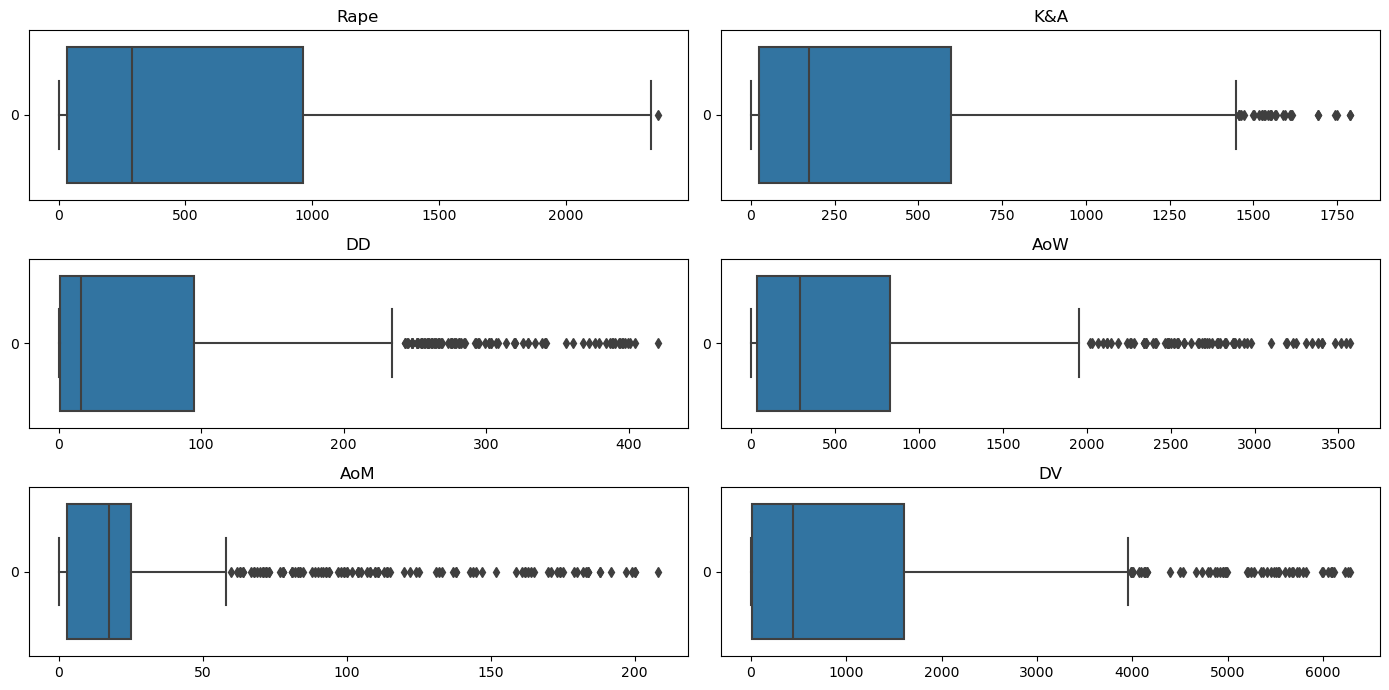

In [261]:
data2 = data[numerical_columns].copy()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,7))
for i, ax in enumerate(axes.flat):
    if i < len(data2.columns):
        sns.boxplot(data2.iloc[:, i], ax=ax, orient='h')  
        ax.set(title = data2.columns.values[i])
    else:
        ax.axis('off')  
        
plt.tight_layout()  
plt.show()

Pada kasus, nilai outlier berkurang dari nilai sebelumnya ( Outlier sebelumnya dapat dilihat https://github.com/CHRYSTELLAAXEL/Analisis-Data-Eksploratif-A-/blob/main/23083010016_Chrystella%20Axel_Tugas%20EDA%20Kelas%20A.ipynb )

# Transformasi

In [271]:
data = pd.read_csv (r'D:\KULIAH\CrimesOnWomenData.csv', sep= ",")
data.head()

,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [306]:
data_rata_rata = data.pivot_table(index='Year', values=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], aggfunc='mean')
data_rata_rata.head()

,AoM,AoW,DD,DV,K&A,Rape,WT
Year,,,,,,,
2001,284.000000,988.882353,198.176471,1442.117647,402.382353,461.588235,3.352941
2002,294.911765,985.205882,196.676471,1444.176471,400.382353,469.705882,2.235294
2003,359.411765,954.411765,178.764706,1455.647059,367.617647,451.676471,1.352941
2004,290.323529,999.000000,202.941176,1672.558824,432.264706,520.058824,2.617647
2005,287.029412,982.735294,196.264706,1676.323529,430.705882,520.617647,4.352941


<Figure size 1000x600 with 0 Axes>

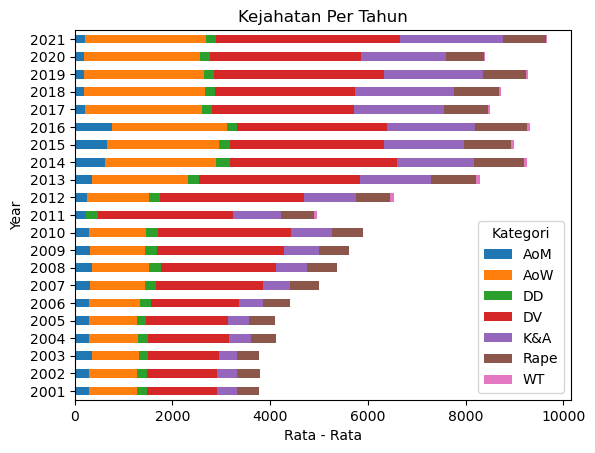

In [308]:
plt.figure(figsize=(10,6))
data_rata_rata.plot(kind='barh', stacked=True)
plt.title('Kejahatan Per Tahun')
plt.xlabel('Rata - Rata')
plt.ylabel('Year')
plt.legend(title='Kategori')
plt.show()

In [301]:
data2 = data.select_dtypes(include=[np.number]).columns
data2 = [col for col in data2 if col not in ['No', 'Year']]

In [302]:
data_log_with_year = data.copy()
data_log_with_year.drop(columns=['No', 'State'], inplace=True)
data_log_with_year[data2] = np.log(data_log_with_year[data2])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [305]:
data_rata_rata2 = data_log_with_year.pivot_table(index='Year', values=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], aggfunc='mean')
data_rata_rata2.head()

,AoM,AoW,DD,DV,K&A,Rape,WT
Year,,,,,,,
2001,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2002,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2003,-inf,5.212647,-inf,-inf,-inf,4.715704,-inf
2004,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2005,-inf,-inf,-inf,-inf,-inf,-inf,-inf


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:2254: RuntimeWarning: invalid value encountered in scalar subtract
  dx = [convert(x0 + ddx) - x for ddx in dx]


<Figure size 1000x600 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


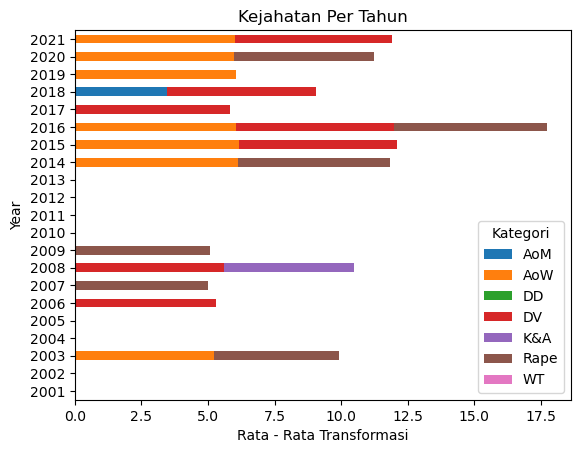

In [309]:
plt.figure(figsize=(10,6))
data_rata_rata2.plot(kind='barh', stacked=True)
plt.title('Kejahatan Per Tahun')
plt.xlabel('Rata - Rata Transformasi')
plt.ylabel('Year')
plt.legend(title='Kategori')
plt.show()